In [122]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import dlib

## Face and contour detection

In [123]:
#face detector, landmark detector load

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [124]:
#image load

path_dir = './LFW-FER/eval/negative/'
file_list = os.listdir(path_dir)

# file_list[0]
img = cv2.imread(path_dir + file_list[0])

In [125]:
faces = face_detector(img, 1)

In [126]:
face_landmark, eyes_landmark = [], []

for k, d in enumerate(faces):
    print("Detection {} face detection -> LeftTop: ({},{}) RightBottom: ({},{})".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
    
    landmarks = landmark_detector(img, d)

    #face landmark number 0 ~ 16, 26 ~ 17 -> face contour
    for n in range(0, 17):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        face_landmark.append((x, y))
        #cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

    for n in range(26, 16, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        face_landmark.append((x, y))
        #cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

    #eye landmark number
    for n in range(36, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y 
        eyes_landmark.append((x, y))


Detection 0 face detection -> LeftTop: (53,67) RightBottom: (182,196)


In [127]:
pt = np.array([face_landmark])

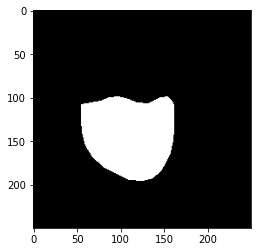

In [128]:
pt = np.array([face_landmark])
mask = np.zeros_like(img)
cv2.fillPoly(mask, pt, (255,255,255))

plt.imshow(mask)

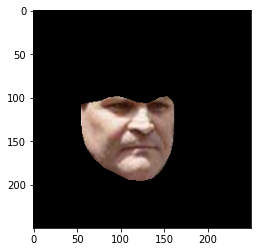

In [129]:
# 마스크를 사용하여 이미지에서 도형 부분 추출
result = cv2.bitwise_and(img, mask)

# 결과 이미지 표시
plt.imshow(result[:,:,::-1])

## Skin color detection

In [130]:
def RGB_YCrCb(img):
    YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    mask = cv2.inRange(YCrCb, np.array([0, 133, 77]), np.array([255, 173, 127]))

    skin = cv2.bitwise_and(img, img, mask = mask)
    return YCrCb, mask, skin

def RGB_hsv(img):
    lower = (0, 48, 80)
    upper = (20, 255, 255)
    HSVimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(HSVimg, lower, upper)

    skin = cv2.bitwise_and(img, img, mask = mask)
    return HSVimg, mask, skin

In [131]:
ycrcb, ycrcb_mask, ycrcb_skin = RGB_YCrCb(result)
hsv, hsv_mask, hsv_skin = RGB_hsv(result)

In [132]:
#figure seting 

def fig_set(fig, rows, cols, num, img, label):
    ax = fig.add_subplot(rows, cols, num)
    ax.imshow(img)
    ax.set_xlabel(label, color = 'white', fontsize=15)
    ax.set_xticks([]), ax.set_yticks([])
    ax.figure.set_size_inches((15,15))

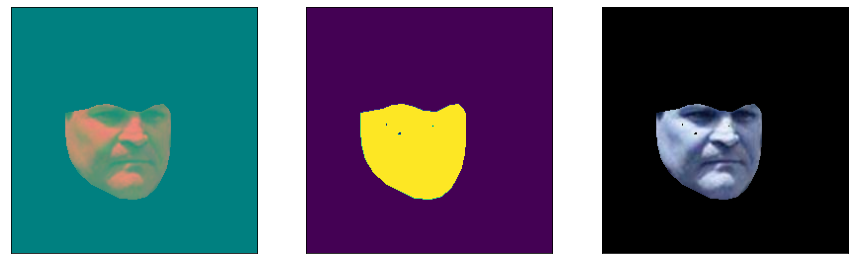

In [133]:
fig = plt.figure()

fig_set(fig, 1, 3, 1, ycrcb, 'YCrCb')
fig_set(fig, 1, 3, 2, ycrcb_mask, 'mask')
fig_set(fig, 1, 3, 3, ycrcb_skin, 'skin')

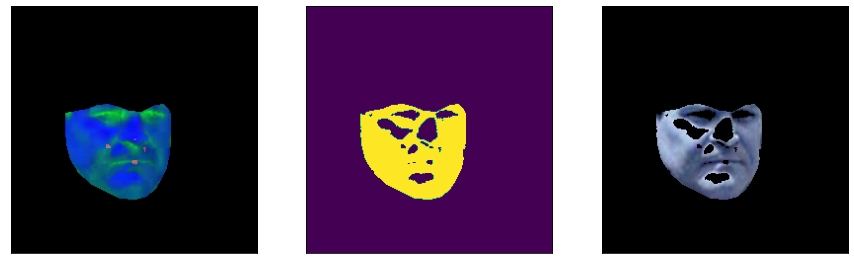

In [134]:
fig = plt.figure()

fig_set(fig, 1, 3, 1, hsv, 'hsv_img')
fig_set(fig, 1, 3, 2, hsv_mask, 'hsv_mask_img')
fig_set(fig, 1, 3, 3, hsv_skin, 'hsv_skin_img')

In [136]:
gray_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
_, t_cus = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)

t, t_otsu = cv2.threshold(gray_img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('threshold: ', t)

threshold:  71.0


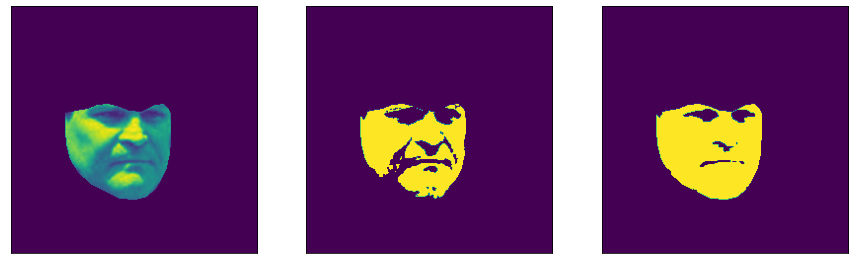

In [138]:
fig = plt.figure()

fig_set(fig, 1, 3, 1, gray_img, 'img_gray')
fig_set(fig, 1, 3, 2, t_cus, 'otsu_costom')
fig_set(fig, 1, 3, 3, t_otsu, 'otsu_thres')

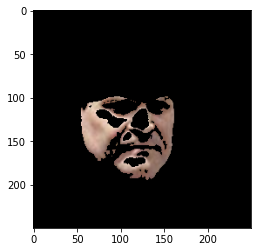

In [141]:
# HSV검출 부분과 Otsu검출 부분을 bitwise연산하여 최종적 이미지 추출
mask = cv2.bitwise_and(hsv_mask, hsv_mask, mask = t_cus)
result = cv2.bitwise_and(result, result, mask = mask)

# 결과 이미지 표시
plt.imshow(result[:,:,::-1])